In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

KeyboardInterrupt: 

In [2]:
# [DO NOT MODIFY THIS CELL]

# load the images
n_img = 50000
n_noisy = 40000
n_clean_noisy = n_img - n_noisy
imgs = np.empty((n_img,32,32,3))

for i in range(n_img):
    img_fn = f'C:\\Users\\fukmy\\Downloads\\train_data\\images\\{i+1:05d}.png'
    imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)
# load the labels
clean_labels = np.genfromtxt('C:\\Users\\fukmy\\Downloads\\train_data\\clean_labels.csv', delimiter=',', dtype="int8")
noisy_labels = np.genfromtxt('C:\\Users\\fukmy\\Downloads\\train_data\\noisy_labels.csv', delimiter=',', dtype="int8")

In [3]:
### convert data into numpy arrays, one with dimension 10000 for training and the other 40000 for testing ###
### for train and test, the first element is the RGB matrix and the second element is the label ###

temp1 = []
for i in range(0,10000):
    temp1.append([imgs[i],clean_labels[i]])
test = np.array(temp1)

temp2 = []
for i in range(0,50000):
    temp2.append([imgs[i],noisy_labels[i]])
train = np.array(temp2)

C:\Users\fukmy\AppData\Local\Temp\ipykernel_11236\758045952.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array(temp1)
C:\Users\fukmy\AppData\Local\Temp\ipykernel_11236\758045952.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(temp2)


In [4]:
### convert the train array into two lists ### 
x_train = []
y_train = []
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

In [5]:
### convert the test array into two lists ### 
x_test = []
y_test = []
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [6]:
### normalize variable ###
x_train = np.array(x_train) / 255
y_train = np.array(y_train) 
x_test = np.array(x_test)/255
y_test = np.array(y_test)

In [7]:
###data augumentation###
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [8]:
###defining model###
###define a simple CNN model with 3 Convolutional layers followed by max-pooling layers. ###
###A dropout layer is added after the 3rd maxpool operation to avoid overfitting. ###
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [9]:
###complie model now using Adam as our optimizer and SparseCategoricalCrossentropy as the loss function. ###
###USE lower learning rate of 0.001 for a smoother curve. ###
opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\fukmy\anaconda3\envs\text-mine\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
### please try fitting the model
test = model.fit(x_train,y_train,epochs = 15 , validation_data = (x_test, y_test))


Epoch 1/15


C:\Users\fukmy\anaconda3\envs\text-mine\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 8s 5ms/step - loss: 2.2705 - accuracy: 0.1537 - val_loss: 2.0400 - val_accuracy: 0.3698
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2400 - accuracy: 0.1914 - val_loss: 1.9543 - val_accuracy: 0.4383
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2221 - accuracy: 0.2074 - val_loss: 1.8692 - val_accuracy: 0.4488
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2076 - accuracy: 0.2232 - val_loss: 1.8483 - val_accuracy: 0.4999
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1952 - accuracy: 0.2297 - val_loss: 1.7622 - val_accuracy: 0.5039
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1833 - accuracy: 0.2378 - val_loss: 1.7628 - val_accuracy: 0.5311
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1706 - accuracy: 0.2454 - val_loss: 1.7433 - val_accuracy: 0.5423
Epo

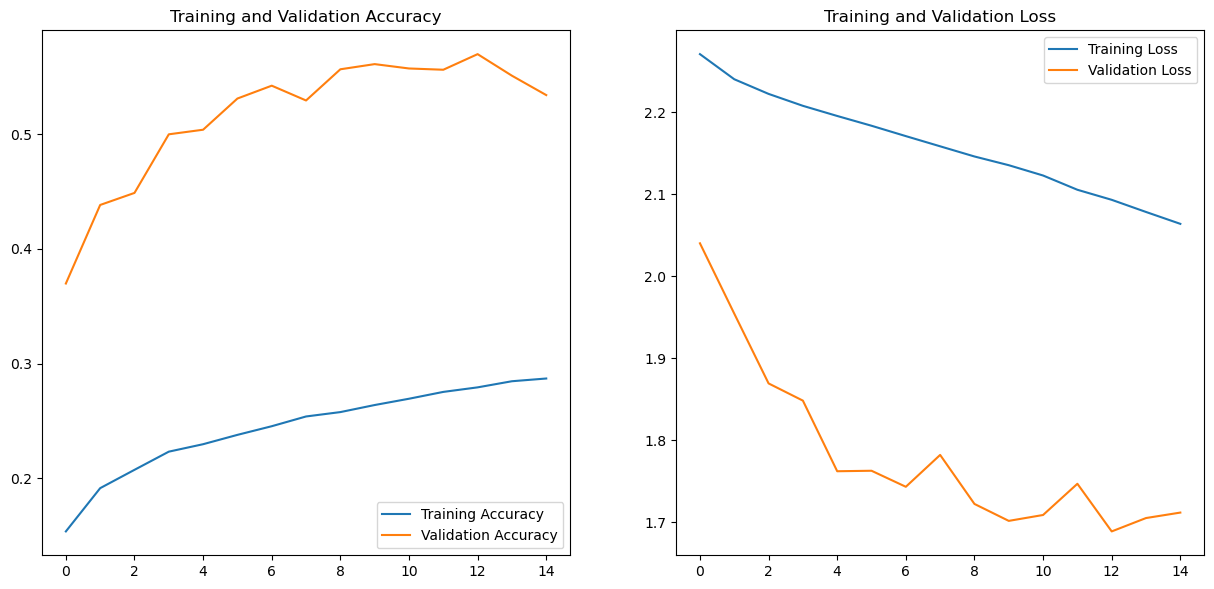

In [12]:
acc = test.history['accuracy']
val_acc = test.history['val_accuracy']
loss = test.history['loss']
val_loss = test.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

MODEL 2

In [ ]:

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Input, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD, Adam, RMSprop, Nadam

In [ ]:
# Define input layers
img_input = Input(shape=(32, 32, 3))
noisy_label = Input(shape=(10))


# Image feature extraction using pre-trained Resnet50
resnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling='max'
)

# Image branch
img_vec = resnet(img_input)
img_vec = Dense(1024)(img_vec)
img_vec = Dense(512)(img_vec)
img_vec = Dense(256)(img_vec)

# Noisy label branch
noisy_l = Dense(10)(noisy_label)

# Concatenate both the noisy label and the image vector
x = Concatenate(axis=-1)([noisy_l, img_vec])
x = Dense(256, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

# data cleaning model
opt_model = Model([img_input, noisy_label], out)

# Compile the model
opt_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'], optimizer=tf.keras.optimizers.Adam(0.001))

# Fit the model using the clean images
clean_labels_train = np.eye(10)[clean_labels[1000:10000]]
noisy_labels_train = np.eye(10)[noisy_labels[1000:10000]]
imgs_train = imgs[1000:10000]


callbacks = [
    EarlyStopping(patience=4)
]

opt_model.fit([imgs_train, noisy_labels_train], clean_labels_train, batch_size=128, epochs=15,
            validation_split=0.2, callbacks=callbacks)


In [ ]:

# Predict the noisy labels, taking the maximum
cleaned_labels = opt_model.predict([imgs[10000:], np.eye(10)[noisy_labels]])
cleaned_labels = [np.argmax(i) for i in cleaned_labels]

# Reconstruct the dataset, using the cleaned data and predicted labels
x_train = np.concatenate((imgs[1000:10000], imgs[10000:]))
y_train = np.concatenate((clean_labels[1000:10000], np.array(cleaned_labels)))

In [ ]:
### please try fitting the model
test = model.fit(x_train,y_train,epochs = 15 , validation_data = (imgs[:1000], clean_labels[:1000]))

In [ ]:
acc = test.history['accuracy']
val_acc = test.history['val_accuracy']
loss = test.history['loss']
val_loss = test.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()